In [2]:
from schemdraw import flow, Drawing
import numpy as np

In [2]:
# RUN THIS BLOCK IF YOU WANT INLINE GRAPICS
# DO NOT RUN THIS BLOCK IF YOU WANT POPOUT GRAPHICS
%matplotlib inline

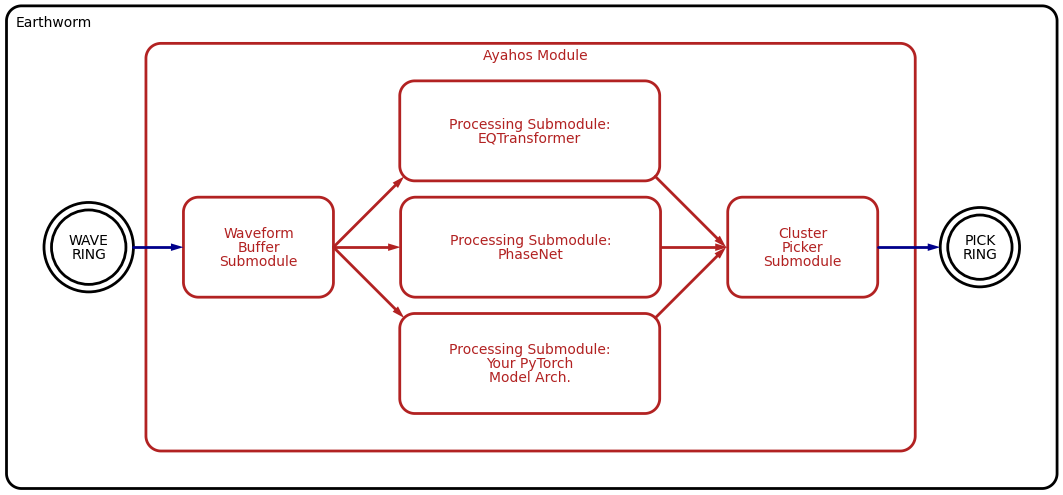

In [3]:
with Drawing() as D:
    D.config(fontsize=10, unit=1)
    with D.container() as EW:
        EW.label('Earthworm')
        s1 = flow.StateEnd().label('WAVE\nRING')
        flow.Arrow().right(D.unit).at(s1.E).color('darkblue')
        with D.container() as AY:
            AY.label('Ayahos Module',
                    loc='N',
                    halign='center',
                    valign='top')
            AY.color('firebrick')
            p1 = flow.RoundProcess().label('Waveform\nBuffer\nSubmodule').color('firebrick')
            # Center Tube
            flow.Arrow().at(p1.E).theta(0).length(D.unit*1.9*np.cos(0.25*np.pi)).color('firebrick')
            p2b = flow.RoundProcess().label('Processing Submodule:\nPhaseNet').color('firebrick')
            flow.Arrow().at(p2b.E).length(D.unit*1.9*np.cos(0.25*np.pi)).color('firebrick')
            # Complete mapping out to end of Ayahos module
            p3 = flow.RoundProcess().label('Cluster\nPicker\nSubmodule').color('firebrick')

            # Upper Submodule
            flow.Arrow().theta(45).at(p1.E).length(D.unit*2).color('firebrick')
            p2a = flow.RoundProcess().label('Processing Submodule:\nEQTransformer').color('firebrick')
            flow.Arrow().theta(-45).at(p2a.SE).length(D.unit*2).color('firebrick')

            # Lower Submodule
            flow.Arrow().at(p1.E).theta(-45).length(D.unit*2).color('firebrick')
            p2c = flow.RoundProcess().label('Processing Submodule:\nYour PyTorch\nModel Arch.').color('firebrick')
            flow.Arrow().theta(45).length(D.unit*2).at(p2c.NE).color('firebrick')

        flow.Arrow().right(D.unit*1.25).at(p3.E).color('darkblue')
        s2 = flow.StateEnd().label('PICK\nRING')


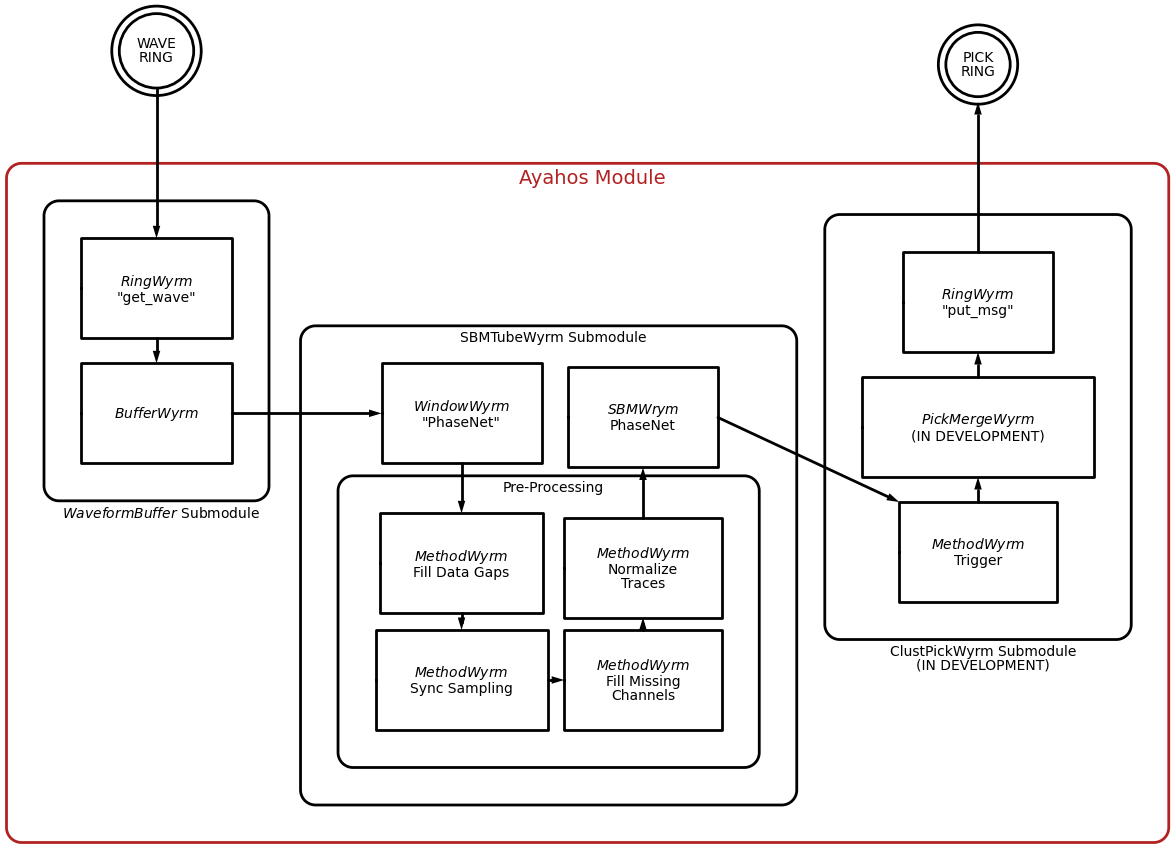

In [4]:
# More detailed schematic showing individual Wyrm base modules

with Drawing() as D:
    D.config(fontsize=10)
    D.config(unit=1)
    D.config()
    s1 = flow.StateEnd().label('WAVE\nRING')
    flow.Arrow().down(D.unit*3).at(s1.S)

    # Ayahos Module Container
    with D.container() as AY:
        AY.label(
            'Ayahos Module',
            loc='N',
            halign='center',
            valign='top',
            fontsize=14,
            color='firebrick')
        AY.color('firebrick')

        # RingBuffer Submodule
        with AY.container() as RB:
            RB.label('$WaveformBuffer$ Submodule', loc='S', valign='top', halign='center')
            p1 = flow.Process().label('$RingWyrm$\n"get_wave"')
            flow.Arrow().down(D.unit/2).at(p1.S)
            p2 = flow.Process().label('$BufferWyrm$')

        flow.Arrow().right(D.unit*3).at(p2.E)
        # SeisBenchModel TubeWyrm Submodule
        with AY.container() as TW:
            TW.label(
                'SBMTubeWyrm Submodule',
                loc='N',
                halign='center',
                valign='top')
            p3 = flow.Process().label('$WindowWyrm$\n"PhaseNet"')
            flow.Arrow().down(D.unit).at(p3.S) #length(D.unit*3).theta(60).at(p3.NE)
            # PreProcessing Submodule
            with TW.container() as PP:
                PP.label('Pre-Processing', loc='N', halign='center', valign='top')
                p4a = flow.Process().label('$MethodWyrm$\nFill Data Gaps')
                flow.Arrow().down(D.unit/3)
                p4b = flow.Process().label('$MethodWyrm$\nSync Sampling')
                flow.Arrow().right(D.unit/3).at(p4b.E)
                p4c = flow.Process().label('$MethodWyrm$\nFill Missing\nChannels')
                flow.Arrow().up(D.unit/4).at(p4c.N)
                p4d = flow.Process().label('$MethodWyrm$\nNormalize\nTraces')
            # Prediction
            flow.Arrow().up(D.unit).at(p4d.N)
            p5 = flow.Process().label('$SBMWrym$\nPhaseNet')
        flow.Arrow().length(D.unit*4).at(p5.E).theta(-25)
        # Cluster Picker Submodule
        with AY.container() as CP:
            CP.label('ClustPickWyrm Submodule\n(IN DEVELOPMENT)',
                     loc='S', halign='center', valign='top')
            p6 = flow.Process().label('$MethodWyrm$\nTrigger')
            flow.Arrow().up(D.unit/2).at(p6.N)
            p7 = flow.Process().label('$PickMergeWyrm$\n(IN DEVELOPMENT)')
            flow.Arrow().up(D.unit/2).at(p7.N)
            p8 = flow.Process().label('$RingWyrm$\n"put_msg"')
    flow.Arrow().up(D.unit*3)
    s2 = flow.StateEnd().label('PICK\nRING')

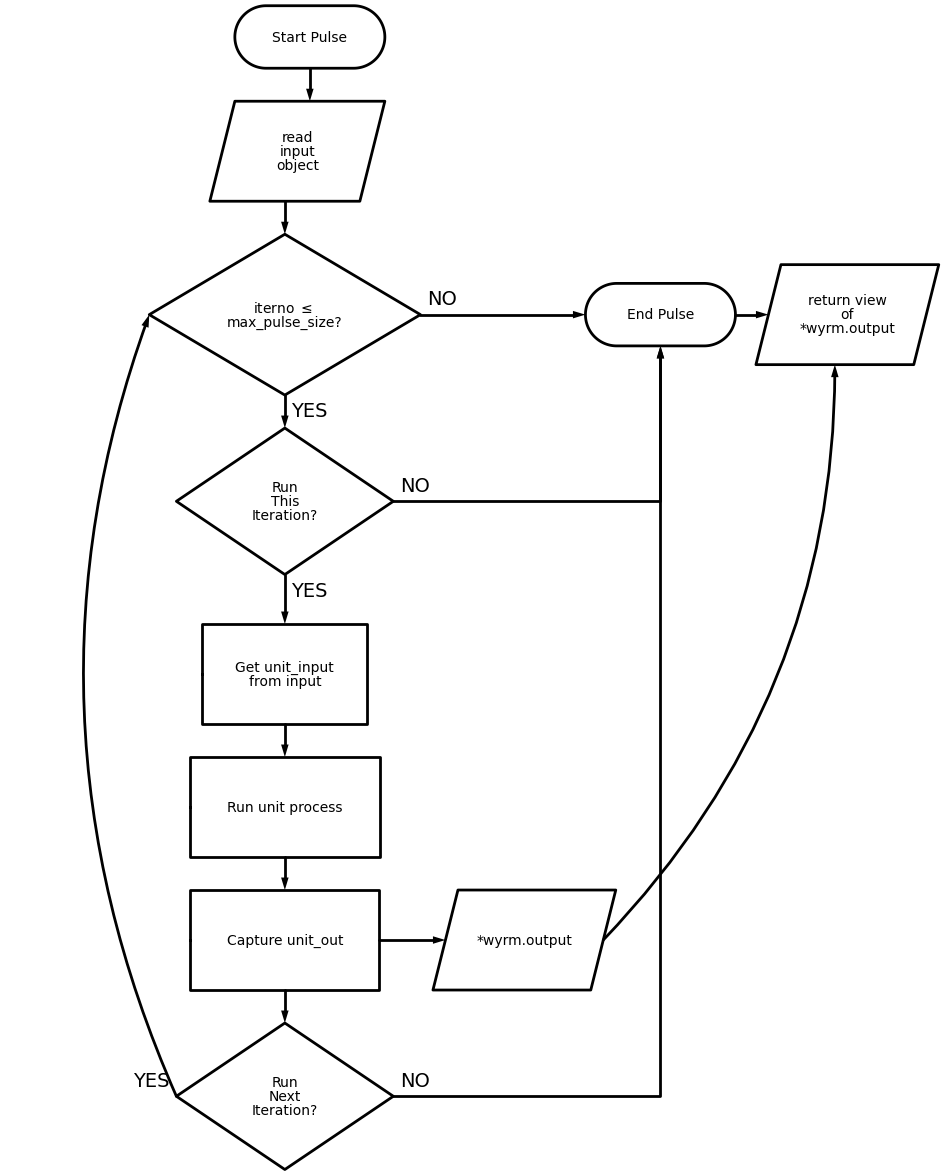

In [5]:
# Pulse Template Flow Diagram
with Drawing(canvas='matplotlib') as E:
    E.config(fontsize=10, unit=0.66)
    start = flow.Start().label('Start Pulse')
    flow.Arrow().down().at(start.S)
    input = flow.Data().label('read\ninput\nobject')
    flow.Arrow().down().at(input.S)
    d1 = flow.Decision(S='YES', E='NO').label('iterno $\\leq$ \nmax_pulse_size?')
    flow.Arrow().right(E.unit*5).at(d1.E)
    end = flow.Start().label('End Pulse').anchor('W')
    flow.Arrow().right().at(end.E)
    output = flow.Data().label('return view\nof\n*wyrm.output')

    flow.Arrow().down().at(d1.S)
    d2 = flow.Decision(S='YES', E='NO').label('Run\nThis\nIteration?')
    flow.Arrow().down().at(d2.S).length(E.unit*1.5)
    p1 = flow.Process().label('Get unit_input\nfrom input')
    flow.Arrow().down().at(p1.S)
    p2 = flow.Process().label('Run unit process')
    flow.Arrow().down().at(p2.S)
    p3 = flow.Process().label('Capture unit_out')
    flow.Arrow().right(E.unit*2).at(p3.E)
    a3 = flow.Data().label('*wyrm.output')

    flow.Arrow().down().at(p3.S)
    d3 = flow.Decision(W='YES', E='NO').label('Run\nNext\nIteration?')

    flow.Arc2(arrow='<-', k=-.2).at(d1.W).to(d3.W)
    flow.Arc2(arrow='->', k=-.2).at(a3.E).to(output.S)
    flow.Wire(shape='-|', arrow='->').at(d2.E).to(end.S)
    flow.Wire(shape='-|', arrow='->').at(d3.E).to(end.S)


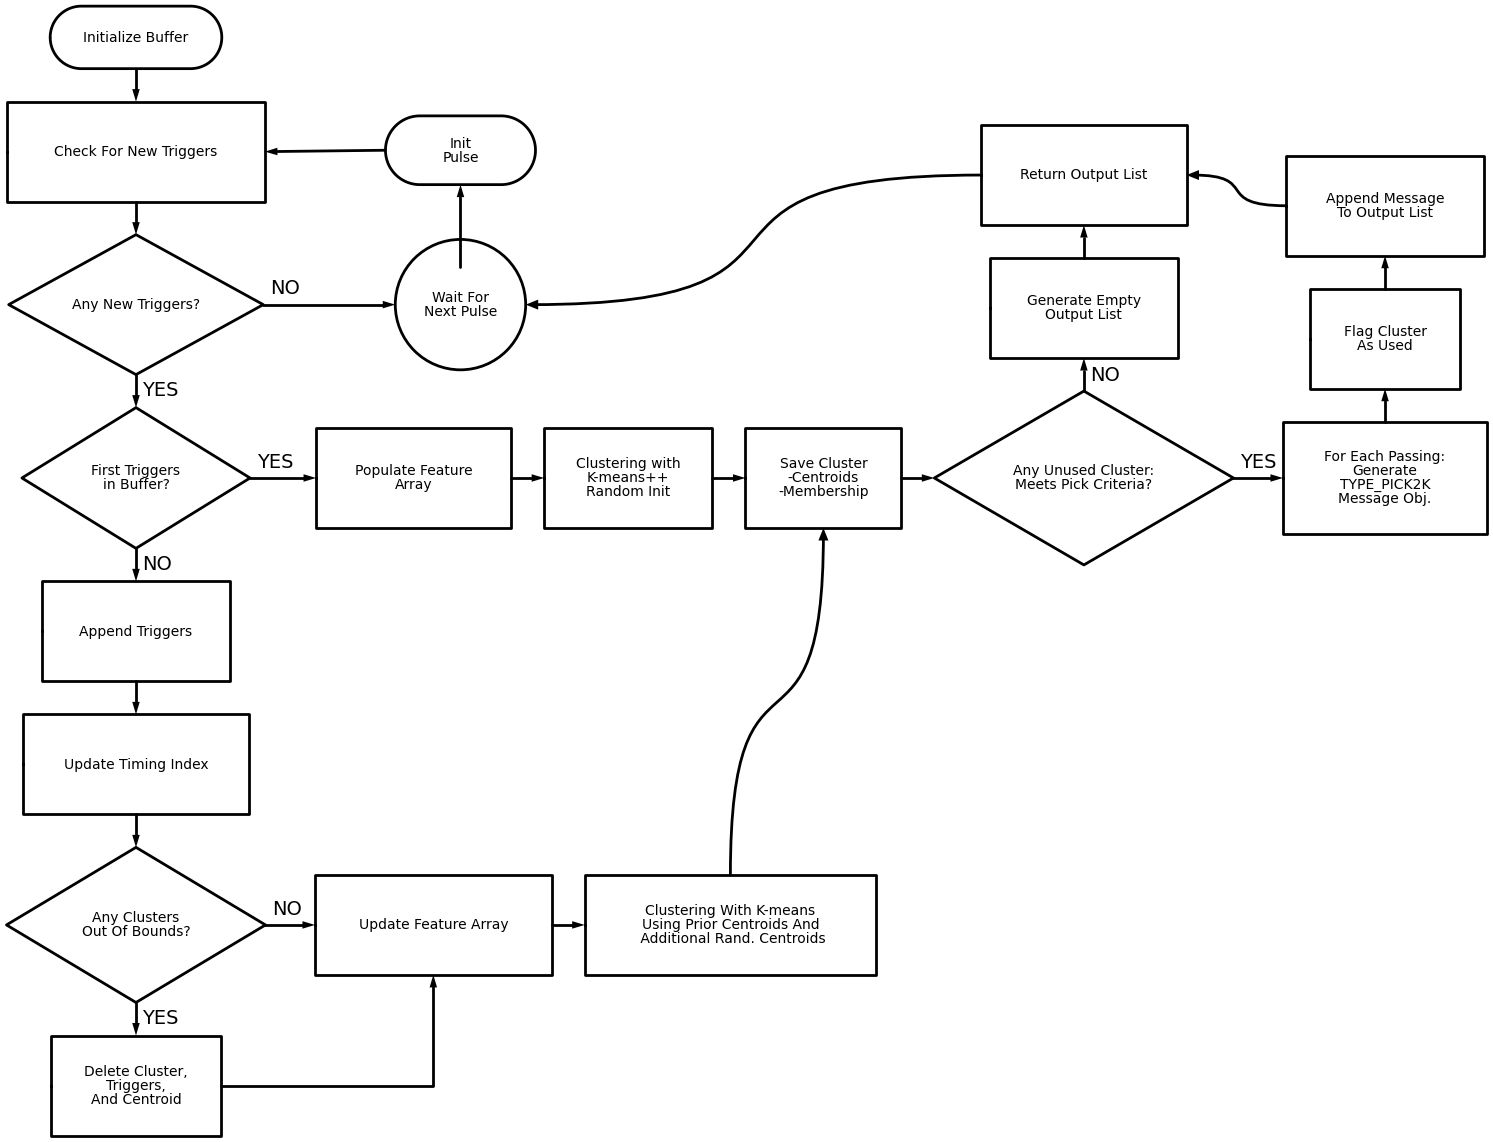

In [38]:
with Drawing(canvas='matplotlib') as T:
    T.config(fontsize=10, unit=0.66)
    start = flow.Start().label('Initialize Buffer')
    flow.Arrow().down().at(start.S)
    p1 = flow.Process().label('Check For New Triggers')
    flow.Arrow().down().at(p1.S)
    new_trig = flow.Decision(E='NO', S='YES').label('Any New Triggers?')
    flow.Arrow().right(T.unit*4).at(new_trig.E)
    s1 = flow.Circle().label('Wait For\nNext Pulse')
    flow.Arrow().up(T.unit*2.5).at(s1.N)
    s2 = flow.Start().label('Init\nPulse').anchor('S')
    flow.Wire(arrow='->').at(s2.W).to(p1.E)    

    flow.Arrow().down().at(new_trig.S)
    first_trigs = flow.Decision(E='YES', S='NO').label('First Triggers\nin Buffer?')
    flow.Arrow().right(T.unit*2).at(first_trigs.E)
    populate_features = flow.Process().label('Populate Feature\nArray')
    flow.Arrow().right().at(populate_features.E)
    rnd_clust = flow.Process().label('Clustering with\nK-means++\nRandom Init')
    flow.Arrow().right().at(rnd_clust.E)
    save_clusts = flow.Process().label('Save Cluster\n-Centroids\n-Membership')
    flow.Arrow().right().at(save_clusts.E)
    clust_pick = flow.Decision(N='NO',E='YES').label('Any Unused Cluster:\nMeets Pick Criteria?')
    flow.Arrow().up().at(clust_pick.N)
    empty_out = flow.Process().label('Generate Empty\nOutput List')
    flow.Arrow().up().at(empty_out.N)
    return_out = flow.Process().label('Return Output List')
    flow.ArcZ(arrow='->').at(return_out.W).to(s1.E)
    flow.Arrow().right(T.unit*1.5).at(clust_pick.E)
    gen_pick = flow.Process().label('For Each Passing:\nGenerate\nTYPE_PICK2K\nMessage Obj.')
    flow.Arrow().up().at(gen_pick.N)
    flag_clust = flow.Process().label('Flag Cluster\nAs Used')
    flow.Arrow().up().at(flag_clust.N)
    append_out = flow.Process().label('Append Message\nTo Output List')
    flow.ArcZ(arrow='->').at(append_out.W).to(return_out.E)
    # send_pick = flow.Process()
    # flow.Wire('|-', arrow='->').at(send_pick.N).to(s1.E)

    flow.Arrow().down().at(first_trigs.S)
    # id_match = flow.Decision(W='NO', S='YES').label('ID and Label Match?')
    # flow.Arrow().down().at(id_match.S)
    appendT = flow.Process().label('Append Triggers')
    flow.Arrow().down().at(appendT.S)
    updateT = flow.Process().label('Update Timing Index')
    flow.Arrow().down()
    oob_cluster = flow.Decision(S='YES', E='NO').label('Any Clusters\nOut Of Bounds?')
    flow.Arrow().down().at(oob_cluster.S)
    drop_oob_cluster = flow.Process().label('Delete Cluster,\nTriggers,\nAnd Centroid')
    flow.Arrow().right(T.unit*1.5).at(oob_cluster.E)
    updateF = flow.Process().label('Update Feature Array')
    flow.Arrow().right().at(updateF.E)
    smart_clust = flow.Process().label('Clustering With K-means\nUsing Prior Centroids And\n Additional Rand. Centroids')
    # flow.ArcN(arrow='->').at(save_clusts.SW).to(smart_clust.NW)
    flow.ArcN(arrow='<-').at(save_clusts.S).to(smart_clust.N)
    flow.Wire('-|',arrow='->').at(drop_oob_cluster.E).to(updateF.S)

    # flow.Arrow().down()
    # oob_trigger = flow.Decision(E='YES', S='NO').label('Any Triggers\nout of bounds?')
    # flow.Arrow().down()


    

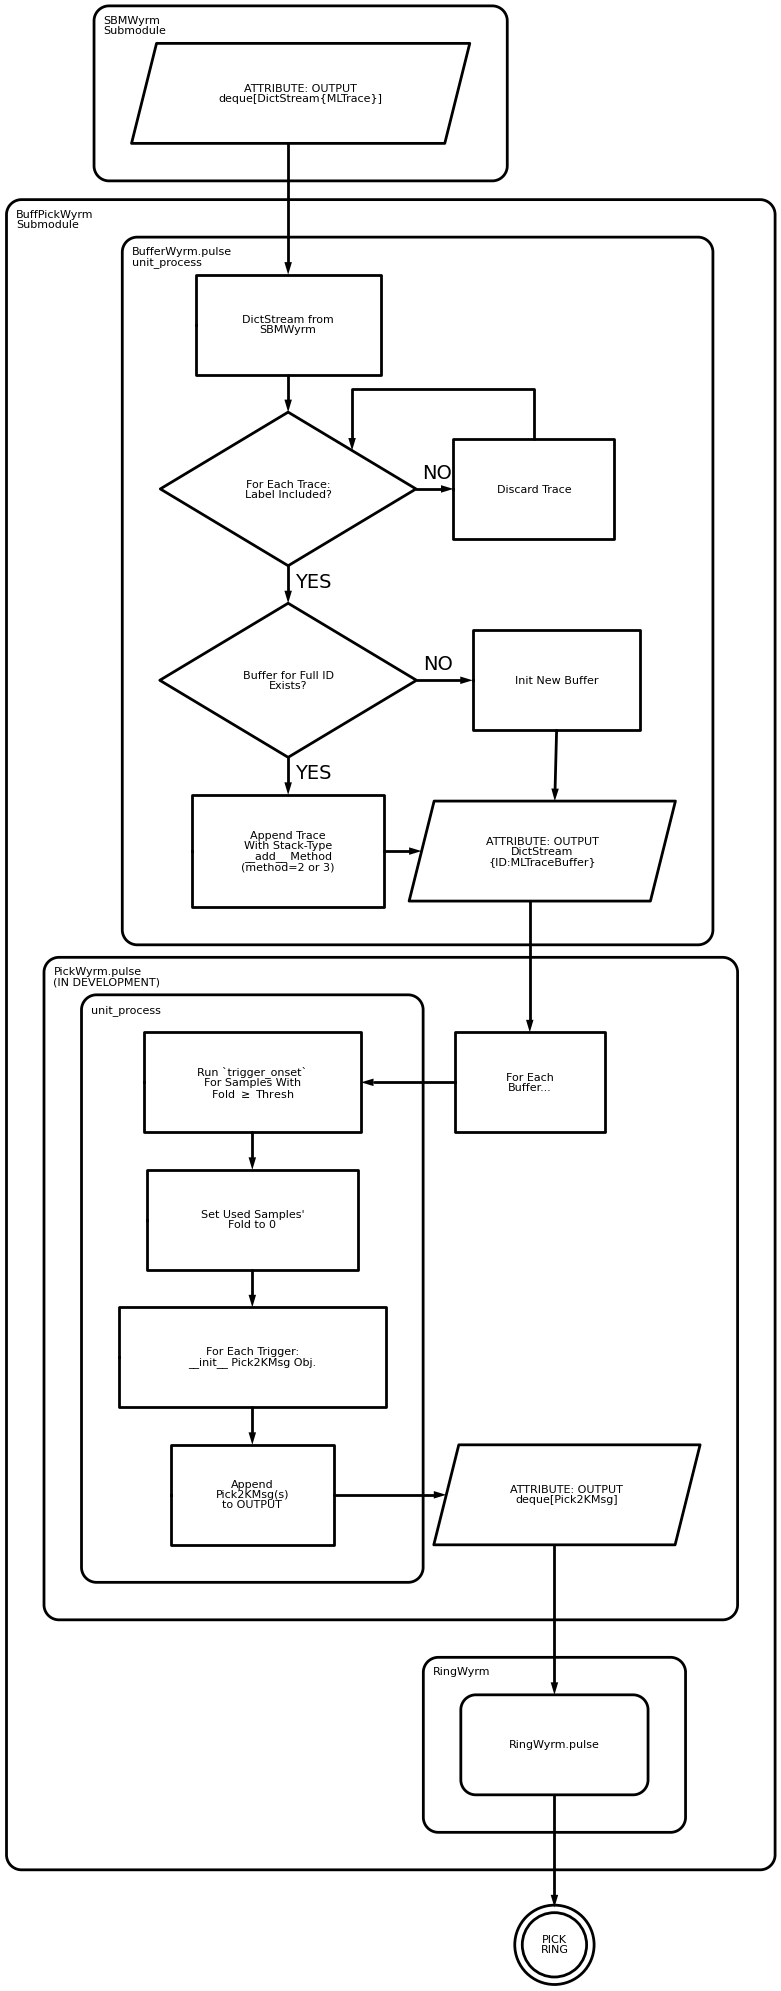

In [82]:
# Stacked Prediciton Picker
with Drawing() as SPP:
    SPP.config(fontsize=8, unit=0.75)
    with SPP.container() as SBM:
        SBM.label('SBMWyrm\nSubmodule')
        sbm_out = flow.Data().label('ATTRIBUTE: OUTPUT\ndeque[DictStream{MLTrace}]')
    flow.Arrow().down(SPP.unit*3.5).at(sbm_out.S)
    with SPP.container() as PB:
        PB.label('BuffPickWyrm\nSubmodule')
        with PB.container() as BW:
            BW.label('BufferWyrm.pulse\nunit_process')
            next_dictstream = flow.Process().label('DictStream from\nSBMWyrm')
            flow.Arrow().down()
            filter_preds = flow.Decision(S='YES', E='NO').label('For Each Trace:\nLabel Included?')
            flow.Arrow().right().at(filter_preds.E)
            skip_trace = flow.Process().label('Discard Trace')
            flow.Wire('n',arrow='->').at(skip_trace.N).to(filter_preds.NE)
            flow.Arrow().down().at(filter_preds.S)
            buffer_exists = flow.Decision(S='YES', E='NO').label('Buffer for Full ID\nExists?')
            flow.Arrow().right(SPP.unit*1.5).at(buffer_exists.E)
            newbuffer = flow.Process().label('Init New Buffer')

            flow.Arrow().down().at(buffer_exists.S)
            stack = flow.Process().label('Append Trace\nWith Stack-Type\n__add__ Method\n(method=2 or 3)')
            flow.Arrow().right(SPP.unit).at(stack.E)
            buffer = flow.Data().label('ATTRIBUTE: OUTPUT\nDictStream\n{ID:MLTraceBuffer}')
            flow.Arrow().at(newbuffer.S).to(buffer.N)
            # flow.Wire('-|', arrow='->').at(newbuffer.E).to(stack.S)

        flow.Arrow().down(SPP.unit*3.5).at(buffer.S)
        with PB.container() as TW:
            TW.label('PickWyrm.pulse\n(IN DEVELOPMENT)')
            for_each_buff = flow.Process().label('For Each\nBuffer...')
            flow.Arrow().left(SPP.unit*2.5).at(for_each_buff.W)
            with TW.container() as TWU:
                TWU.label('unit_process')
                fold_pick = flow.Process().label('Run `trigger_onset`\nFor Samples With\nFold $\\geq$ Thresh')
                flow.Arrow().down().at(fold_pick.S)
                fold_zero = flow.Process().label("Set Used Samples'\nFold to 0")
                flow.Arrow().down().at(fold_zero.S)
                pick2k_obj = flow.Process().label('For Each Trigger:\n__init__ Pick2KMsg Obj.')
                flow.Arrow().down().at(pick2k_obj.S)
                append = flow.Process().label('Append\nPick2KMsg(s)\nto OUTPUT')
            flow.Arrow().right(SPP.unit*3).at(append.E)
            pick_queue = flow.Data().label('ATTRIBUTE: OUTPUT\ndeque[Pick2KMsg]')
        flow.Arrow().down(SPP.unit*4).at(pick_queue.S)
        with PB.container() as RW:
            RW.label('RingWyrm')
            ringwyrmpulse = flow.RoundProcess().label('RingWyrm.pulse')
    flow.Arrow().down(SPP.unit*3).at(ringwyrmpulse.S)
    pick_ring = flow.StateEnd().label('PICK\nRING')

            
